I compared the ICRF3 K catalog with the ICRF2 catalog.

In [1]:
from astropy.table import Table, join, Column
from astropy import units as u
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "svg"

# My modules
from my_progs.catalog.vsh_deg1_cor import vsh_deg01_fitting
from my_progs.catalog.vsh_deg2_cor import vsh_deg02_fitting, residual_calc02
from my_progs.catalog.pos_diff import nor_sep, pos_diff_calc
from my_progs.catalog.pos_err import pos_err_calc
from my_progs.catalog.write_output import print_vsh1_corr, print_vsh2_corr
from my_progs.catalog.read_icrfn import read_icrf2, read_icrf3

In [2]:
# Read ICRF3 K catalog
icrf3k = read_icrf3(wv="k")
icrf3k

icrf_name,iers_name,type,ra,dec,ra_err,dec_err,ra_dec_corr,mean_obs,pos_err,beg_obs,end_obs,nb_sess,nb_del
,,,deg,deg,mas,mas,,,,,,,
str16,str8,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64
J000435.6-473619,0002-478,D,1.1485647359583333,-47.60544541102778,0.4516681517736428,1.0827,0.6589,57961.2,1.1267942729306641,57599.3,58067.8,7,13
J000504.3+542824,0002+541,--,1.2681805876666665,54.473590121250005,0.07321584713652726,0.0905,0.0477,57561.2,0.09069246230326641,53898.6,58181.5,9,732
J000557.1+382015,0003+380,--,1.4882307991666666,38.3375413845,0.05294498242586314,0.07369999999999999,-0.1988,57909.1,0.07512354105978385,57372.1,58195.8,10,724
J000613.8-062335,0003-066,--,1.5578870084583334,-6.393148817805556,0.047850566755598754,0.10609999999999999,-0.4903,57819.0,0.10909553579758349,56782.4,58181.5,9,658
J000903.9+062821,0006+061,--,2.2663827199999997,6.472566606222222,0.11506188429537391,0.22569999999999998,-0.3528,57837.4,0.23032386525156387,52782.5,58195.8,7,316
J001031.0+105829,0007+106,D,2.6291912593749993,10.974862327916666,0.04785840167457787,0.09199999999999998,-0.333,55132.2,0.09377908666520379,52782.5,58244.2,12,1043
J001101.2-261233,0008-264,--,2.7551947386666664,-26.209271354527775,0.07845899574871043,0.2045,-0.3768,57655.1,0.2069232370376186,57416.9,58070.2,9,298
J001135.2+082355,0009+081,--,2.8969566952083325,8.398773987166667,0.0753827899464934,0.1347,-0.2236,54738.5,0.13617954520385336,52782.5,58082.4,10,579


In [3]:
# Read ICRF2 data
icrf2 = read_icrf2()
icrf2

icrf_name,ivs_name,iers_name,ra,dec,type,ra_err,dec_err,ra_dec_corr,pos_err,mean_obs,beg_obs,end_obs,nb_sess,nb_del
,,,deg,deg,,mas,mas,,mas,,,,,
str16,str8,str8,float64,float64,str1,float64,float64,float64,float64,float64,float64,float64,int64,int64
J000020.3-322101,2357-326,2357-326,0.08499978154166665,-32.35034264325,V,0.4228606361249806,0.9246,-0.004,0.9246019563265486,52306.7,52306.7,52306.7,1,40
J000053.0+405401,2358+406,2358+406,0.2211731990833333,40.90049807775,V,1.7733322629796062,2.0936,-0.164,2.1522926501977038,50242.8,50242.8,50242.8,1,22
J000105.3-155107,2358-161,2358-161,0.27220320083333327,-15.851965569361111,V,0.4592928857503561,0.8910999999999999,-0.749,0.9620600872877471,50632.3,50632.3,50632.3,1,58
J000107.0+605122,2358+605,2358+605,0.27958165691666664,60.85633416630556,V,2.3293508596752726,3.5917999999999997,-0.102,3.6051651029612515,52306.7,52306.7,52306.7,1,11
J000108.6+191433,2358+189,2358+189,0.28592319541666666,19.242722705277778,N,0.06939362024552428,0.0984,0.08,0.09870723270272877,53306.0,50085.5,54907.7,21,716
J000211.9-215309,2359-221,2359-221,0.5499276015,-21.88606554838889,N,16.062415294281355,38.6714,0.971,41.72301021726925,54818.7,54818.7,54818.7,1,3
J000315.9-194150,0000-199,0000-199,0.8164555134166667,-19.697332749361113,V,4.6366314167931675,13.643499999999998,-0.943,14.33480339351269,54088.1,54088.1,54088.1,1,11
J000318.6-192722,0000-197,0000-197,0.8278126013333333,-19.456209681833332,V,0.4859687733303084,0.9445999999999999,-0.224,0.9528939533621429,50650.0,50632.3,50688.3,2,76


A crossmatch is performed to obtain a sample of 698 common sources.

In [4]:
com_sou = join(icrf3k, icrf2, keys="iers_name", table_names=["icrf3k", "icrf2"])
com_sou

icrf_name_icrf3k,iers_name,type_icrf3k,ra_icrf3k,dec_icrf3k,ra_err_icrf3k,dec_err_icrf3k,ra_dec_corr_icrf3k,mean_obs_icrf3k,pos_err_icrf3k,beg_obs_icrf3k,end_obs_icrf3k,nb_sess_icrf3k,nb_del_icrf3k,icrf_name_icrf2,ivs_name,ra_icrf2,dec_icrf2,type_icrf2,ra_err_icrf2,dec_err_icrf2,ra_dec_corr_icrf2,pos_err_icrf2,mean_obs_icrf2,beg_obs_icrf2,end_obs_icrf2,nb_sess_icrf2,nb_del_icrf2
,,,deg,deg,mas,mas,,,,,,,,,,deg,deg,,mas,mas,,mas,,,,,
str16,str8,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,str16,str8,float64,float64,str1,float64,float64,float64,float64,float64,float64,float64,int64,int64
J000504.3+542824,0002+541,--,1.2681805876666665,54.473590121250005,0.07321584713652726,0.0905,0.0477,57561.2,0.09069246230326641,53898.6,58181.5,9,732,J000504.3+542824,0002+541,1.2681810385416665,54.47359068861111,V,0.7491549969176401,1.1304999999999998,0.452,1.2016770811288238,49577.0,49577.0,49577.0,1,60
J000435.6-473619,0002-478,D,1.1485647359583333,-47.60544541102778,0.4516681517736428,1.0827,0.6589,57961.2,1.1267942729306641,57599.3,58067.8,7,13,J000435.6-473619,0002-478,1.148564599333333,-47.605445497194445,D,0.13744223404595796,0.21389999999999998,0.383,0.2232677786078054,52501.0,49330.5,54670.7,28,129
J000557.1+382015,0003+380,--,1.4882307991666666,38.3375413845,0.05294498242586314,0.07369999999999999,-0.1988,57909.1,0.07512354105978385,57372.1,58195.8,10,724,J000557.1+382015,0003+380,1.4882307986666665,38.337541372472224,N,0.057415892062467735,0.062099999999999995,-0.083,0.0631176949767094,52010.2,48720.9,54718.7,26,1518
J000613.8-062335,0003-066,--,1.5578870084583334,-6.393148817805556,0.047850566755598754,0.10609999999999999,-0.4903,57819.0,0.10909553579758349,56782.4,58181.5,9,658,J000613.8-062335,0003-066,1.5578870353749998,-6.393148698944445,N,0.041291610574398126,0.043699999999999996,-0.035,0.043904526993836374,52342.2,47176.5,54889.8,1254,26713
J000903.9+062821,0006+061,--,2.2663827199999997,6.472566606222222,0.11506188429537391,0.22569999999999998,-0.3528,57837.4,0.23032386525156387,52782.5,58195.8,7,316,J000903.9+062821,0006+061,2.266382716083333,6.472566605444444,V,0.20433917534870538,0.4352,0.205,0.4377404579654553,52409.7,52409.7,52409.7,1,72
J001031.0+105829,0007+106,D,2.6291912593749993,10.974862327916666,0.04785840167457787,0.09199999999999998,-0.333,55132.2,0.09377908666520379,52782.5,58244.2,12,1043,J001031.0+105829,IIIZW2,2.629191257749999,10.974862328527777,D,0.07230300068359731,0.09299999999999999,-0.187,0.09519151082122687,53063.9,47288.7,54803.7,29,559
J001101.2-261233,0008-264,--,2.7551947386666664,-26.209271354527775,0.07845899574871043,0.2045,-0.3768,57655.1,0.2069232370376186,57416.9,58070.2,9,298,J001101.2-261233,0008-264,2.755194743583333,-26.20927139363889,D,0.08882150459133523,0.09359999999999999,-0.183,0.09953750841165371,52407.5,47686.1,54768.6,45,592
J001135.2+082355,0009+081,--,2.8969566952083325,8.398773987166667,0.0753827899464934,0.1347,-0.2236,54738.5,0.13617954520385336,52782.5,58082.4,10,579,J001135.2+082355,0009+081,2.896956794291666,8.398773964527777,N,0.1936506710352616,0.4119999999999999,-0.455,0.4231473765332883,52574.8,49914.7,53609.2,2,100


In [5]:
com_sou.colnames

['icrf_name_icrf3k',
 'iers_name',
 'type_icrf3k',
 'ra_icrf3k',
 'dec_icrf3k',
 'ra_err_icrf3k',
 'dec_err_icrf3k',
 'ra_dec_corr_icrf3k',
 'mean_obs_icrf3k',
 'pos_err_icrf3k',
 'beg_obs_icrf3k',
 'end_obs_icrf3k',
 'nb_sess_icrf3k',
 'nb_del_icrf3k',
 'icrf_name_icrf2',
 'ivs_name',
 'ra_icrf2',
 'dec_icrf2',
 'type_icrf2',
 'ra_err_icrf2',
 'dec_err_icrf2',
 'ra_dec_corr_icrf2',
 'pos_err_icrf2',
 'mean_obs_icrf2',
 'beg_obs_icrf2',
 'end_obs_icrf2',
 'nb_sess_icrf2',
 'nb_del_icrf2']

To see how many so-called ICRF2 defining sources are still kept in the ICRF3 defining source list.

In [6]:
mask0 = (com_sou["type_icrf3k"] == "D") & (com_sou["type_icrf2"] == "D")
N0 = len(com_sou[mask0])

mask1 = (com_sou["type_icrf3k"] != "D") & (com_sou["type_icrf2"] == "D")
N1 = len(com_sou[mask1])

mask2_1 = (com_sou["type_icrf3k"] == "D") & (com_sou["type_icrf2"] == "V")
N2_1 = len(com_sou[mask2_1])

mask2_2 = (com_sou["type_icrf3k"] == "D") & (com_sou["type_icrf2"] == "N")
N2_2 = len(com_sou[mask2_2])

mask2 = (com_sou["type_icrf3k"] == "D") & (com_sou["type_icrf2"] != "D")
N2 = len(com_sou[mask2])

mask3 = (com_sou["type_icrf3k"] != "D") & (com_sou["type_icrf2"] != "D")
N3 = len(com_sou[mask3])

N0, N1, N2_1, N2_2, N3, N0 / 295.

(126, 99, 11, 52, 410, 0.4271186440677966)

Only 56% ICRF2 defining sources still remain in the defining source list.
This means that 130 among the ICRF2 defining sources are found or considered to be unstable.
And there are also 131 sources entering the defining source list that were considered not suitable for defining the celestial reference frame, among which 22 are VCS sources (maybe observed in RDV sessions) and 109 non-VCS sources.

In [7]:
# Seperate the sources into the four catagories: 
# A (defining sources in both catalogs)
com_souA = com_sou[mask0]

# B (defining sources in ICRF3 but not in ICRF2)
com_souB = com_sou[mask1]

# C (defining sources in ICRF2 but not in ICRF3)
com_souC = com_sou[mask2]

# D (non-defining sources in both catalogs)
com_souD = com_sou[mask3]

Plot the sky dostribution of these sources.

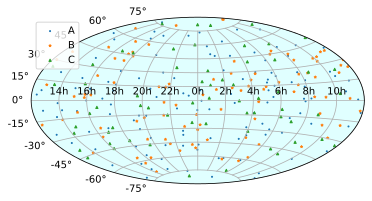

In [8]:
# Transform the coordinate into an astropy.coordinate.SkyCoord object
# A
coord_A = SkyCoord(ra=com_souA["ra_icrf3k"], dec=com_souA["dec_icrf3k"])
# The mid-point of skyplot will be 0
ra_rad_A = coord_A.ra.wrap_at(180 * u.deg).radian
dec_rad_A = coord_A.dec.radian

# B
coord_B = SkyCoord(ra=com_souB["ra_icrf3k"], dec=com_souB["dec_icrf3k"])
# The mid-point of skyplot will be 0
ra_rad_B = coord_B.ra.wrap_at(180 * u.deg).radian
dec_rad_B = coord_B.dec.radian

# C
coord_C = SkyCoord(ra=com_souC["ra_icrf3k"], dec=com_souC["dec_icrf3k"])
# The mid-point of skyplot will be 0
ra_rad_C = coord_C.ra.wrap_at(180 * u.deg).radian
dec_rad_C = coord_C.dec.radian

# D
coord_D = SkyCoord(ra=com_souD["ra_icrf3k"], dec=com_souD["dec_icrf3k"])
# The mid-point of skyplot will be 0
ra_rad_D = coord_D.ra.wrap_at(180 * u.deg).radian
dec_rad_D = coord_D.dec.radian


ax = plt.subplot(111, projection="aitoff", facecolor="lightcyan")
# plt.title("Distribution of ", y=1.08)
ax.scatter(ra_rad_A, dec_rad_A, marker=".", s=5, label="A")
ax.scatter(ra_rad_B, dec_rad_B, marker="*", s=5, label="B")
ax.scatter(ra_rad_C, dec_rad_C, marker="^", s=5, label="C")
# ax.scatter(ra_rad_D, dec_rad_D, marker="v", s=1, label="D")

pi = np.pi
ax.set_xticks(np.arange(-5./6 * pi, pi, pi/6))
ax.set_xticklabels(["14h", "16h", "18h", "20h", "22h",
                     "0h", "2h", "4h", "6h", "8h", "10h"])

ax.legend()
ax.grid(True)

Next step is to calculate the positional offset (ICRF2 - ICRF3SX).

In [9]:
[dRA, dDC, dRA_err, dDC_err, dRA_dDC_cov,
 ang_sep, X_a, X_d, X, X2] = pos_diff_calc(
    com_sou["ra_icrf2"], com_sou["ra_err_icrf2"], 
    com_sou["dec_icrf2"], com_sou["dec_err_icrf2"], com_sou["ra_dec_corr_icrf2"],
    com_sou["ra_icrf3k"], com_sou["ra_err_icrf3k"], 
    com_sou["dec_icrf3k"], com_sou["dec_err_icrf3k"], com_sou["ra_dec_corr_icrf3k"])

com_sou.add_columns([dRA, dDC, dRA_err, dDC_err, dRA_dDC_cov, ang_sep, X_a, X_d, X, X2],
                    names=["dra", "ddec", "dra_err", "ddec_err", "dra_ddec_cov",
                           "ang_sep", "nor_dra",  "nor_ddec", "nor_sep_cov", "nor_sep"])

com_sou["dra"].unit = u.mas
com_sou["ddec"].unit = u.mas
com_sou["dra_err"].unit = u.mas

com_sou

icrf_name_icrf3k,iers_name,type_icrf3k,ra_icrf3k,dec_icrf3k,ra_err_icrf3k,dec_err_icrf3k,ra_dec_corr_icrf3k,mean_obs_icrf3k,pos_err_icrf3k,beg_obs_icrf3k,end_obs_icrf3k,nb_sess_icrf3k,nb_del_icrf3k,icrf_name_icrf2,ivs_name,ra_icrf2,dec_icrf2,type_icrf2,ra_err_icrf2,dec_err_icrf2,ra_dec_corr_icrf2,pos_err_icrf2,mean_obs_icrf2,beg_obs_icrf2,end_obs_icrf2,nb_sess_icrf2,nb_del_icrf2,dra,ddec,dra_err,ddec_err,dra_ddec_cov,ang_sep,nor_dra,nor_ddec,nor_sep_cov,nor_sep
,,,deg,deg,mas,mas,,,,,,,,,,deg,deg,,mas,mas,,mas,,,,,,mas,mas,mas,mas,mas,deg,deg,deg,deg,deg
str16,str8,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,str16,str8,float64,float64,str1,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
J000504.3+542824,0002+541,--,1.2681805876666665,54.473590121250005,0.07321584713652726,0.0905,0.0477,57561.2,0.09069246230326641,53898.6,58181.5,9,732,J000504.3+542824,0002+541,1.2681810385416665,54.47359068861111,V,0.7491549969176401,1.1304999999999998,0.452,1.2016770811288238,49577.0,49577.0,49577.0,1,60,0.9431769891428764,2.0424999803481114,0.7527242321584902,1.134116616578736,0.3831237770846685,2.2497530981355838,1.25301796972611,1.8009611626268867,1.8684656151452714,2.193972456925321
J000435.6-473619,0002-478,D,1.1485647359583333,-47.60544541102778,0.4516681517736428,1.0827,0.6589,57961.2,1.1267942729306641,57599.3,58067.8,7,13,J000435.6-473619,0002-478,1.148564599333333,-47.605445497194445,D,0.13744223404595796,0.21389999999999998,0.383,0.2232677786078054,52501.0,49330.5,54670.7,28,129,-0.33162110824399305,-0.31019999369164,0.472117026833562,1.103626975023717,0.33347578436130626,0.45408875290989936,-0.7024129387328817,-0.2810732255660693,0.7358440527724333,0.756562022989178
J000557.1+382015,0003+380,--,1.4882307991666666,38.3375413845,0.05294498242586314,0.07369999999999999,-0.1988,57909.1,0.07512354105978385,57372.1,58195.8,10,724,J000557.1+382015,0003+380,1.4882307986666665,38.337541372472224,N,0.057415892062467735,0.062099999999999995,-0.083,0.0631176949767094,52010.2,48720.9,54718.7,26,1518,-0.0014118663150757365,-0.04329999399033113,0.07810093357575121,0.09637478923452958,-0.0010716653191690567,0.04332300596743441,-0.018077457597947242,-0.4492875609300676,0.4568698669809573,0.44965109460524477
J000613.8-062335,0003-066,--,1.5578870084583334,-6.393148817805556,0.047850566755598754,0.10609999999999999,-0.4903,57819.0,0.10909553579758349,56782.4,58181.5,9,658,J000613.8-062335,0003-066,1.5578870353749998,-6.393148698944445,N,0.041291610574398126,0.043699999999999996,-0.035,0.043904526993836374,52342.2,47176.5,54889.8,1254,26713,0.09629740150759701,0.42790000023273933,0.06320343220632689,0.11474711325344963,-0.002552381716970196,0.43860186928043715,1.5236103190288026,3.729069848472858,4.8047774808824,4.028318549846875
J000903.9+062821,0006+061,--,2.2663827199999997,6.472566606222222,0.11506188429537391,0.22569999999999998,-0.3528,57837.4,0.23032386525156387,52782.5,58195.8,7,316,J000903.9+062821,0006+061,2.266382716083333,6.472566605444444,V,0.20433917534870538,0.4352,0.205,0.4377404579654553,52409.7,52409.7,52409.7,1,72,-0.014010125378679707,-0.002800000231673039,0.2345074322911557,0.4902443574382065,0.009068295809597731,0.014287183572128354,-0.05974277762457122,-0.005711437957806518,0.05975118249690192,0.0600151647656227
J001031.0+105829,0007+106,D,2.6291912593749993,10.974862327916666,0.04785840167457787,0.09199999999999998,-0.333,55132.2,0.09377908666520379,52782.5,58244.2,12,1043,J001031.0+105829,IIIZW2,2.629191257749999,10.974862328527777,D,0.07230300068359731,0.09299999999999999,-0.187,0.09519151082122687,53063.9,47288.7,54803.7,29,559,-0.0057430086761160945,0.002200000182028816,0.08670726912259151,0.13081666560496027,-0.0027236114785908084,0.006149971500330026,-0.0662344545530123,0.01681743049981391,0.06624113585346603,0.06833614664693294
J001101.2-261233,0008-264,--,2.7551947386666664,-2

In [10]:
# Seperate the sources into the "defining sources" and "other sources".
# Defining sources
mask_def = (com_sou["type_icrf3k"] == "D")
com_def = com_sou[mask_def]

# Other sources
mask_oth = (com_sou["type_icrf3k"] != "D")
com_oth = com_sou[mask_oth]

Several plots related to the positional difference.

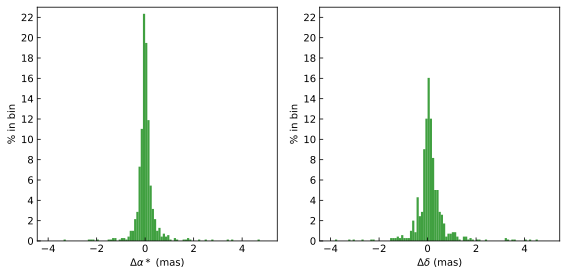

In [11]:
# Difference in RA and decl.
bins_array = np.linspace(-4, 5, 100)
weights = np.ones_like(dRA) * 100. / dRA.size

fig, (ax0, ax1) = plt.subplots(figsize=(8, 4), ncols=2)
ax0.hist(dRA, bins_array, weights=weights, facecolor="g", alpha=0.75)
ax1.hist(dDC, bins_array, weights=weights, facecolor="g", alpha=0.75)

ax0.set_yticks(np.arange(0, 24, 2))
ax1.set_yticks(np.arange(0, 24, 2))

ax0.set_ylim([0, 23])
ax1.set_ylim([0, 23])

ax0.set_xlabel("$\Delta\\alpha*$ (mas)")
ax1.set_xlabel("$\Delta\\delta$ (mas)")

ax0.set_ylabel("% in bin")
ax1.set_ylabel("% in bin")

fig.tight_layout()
plt.show()

In [12]:
std_ra = np.std(X_a)
std_dec = np.std(X_d)

std_ra, std_dec

(1.6859404012368902, 1.3830666518817187)

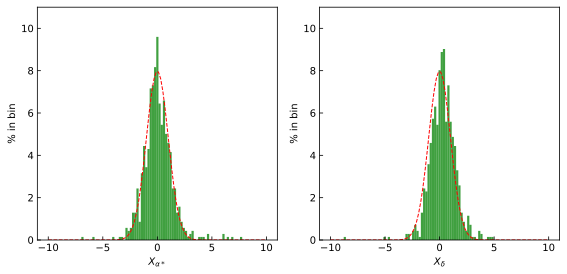

In [13]:
# Normalized difference in RA and decl.
from scipy import stats
bins_array = np.linspace(-10, 10, 100)
weights = np.ones_like(dRA) * 100. / dRA.size

# Plot the 
fig, (ax0, ax1) = plt.subplots(figsize=(8, 4), ncols=2)
ax0.hist(X_a, bins_array, weights=weights, facecolor="g", alpha=0.75)
ax1.hist(X_d, bins_array, weights=weights, facecolor="g", alpha=0.75)

ax0.set_xlabel("$X_{\\alpha*}$")
ax1.set_xlabel("$X_{\\delta}$")

ax0.set_ylim([0, 11])
ax1.set_ylim([0, 11])

ax0.set_ylabel("% in bin")
ax1.set_ylabel("% in bin")

# add a '(standard) Gaussian distribution' line
Gaussian_dist = stats.norm.pdf(bins_array, 0, 1) * 10. / 50
ax0.plot(bins_array, Gaussian_dist * 100, "r--", linewidth=1)
ax1.plot(bins_array, Gaussian_dist * 100, "r--", linewidth=1)

ax0.set_yticks(np.arange(0, 12, 2))
ax1.set_yticks(np.arange(0, 12, 2))

fig.tight_layout()
plt.show()

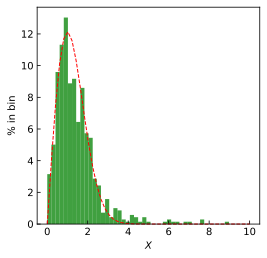

In [14]:
# Distribution of normalized separation
from scipy import stats

bins_array = np.linspace(0, 10, 50)
weights = np.ones_like(X) * 100. / X.size

fig, ax = plt.subplots(figsize=(4, 4))
ax.hist(X, bins_array, weights=weights, facecolor="g", alpha=0.75)

# add a '(standard) Rayleigh distribution' line
rayleigh_dist = stats.rayleigh.pdf(bins_array) * 10. / 50  * 100
ax.plot(bins_array, rayleigh_dist, "r--", linewidth=1)

ax.set_xlabel("$X$")
ax.set_ylabel("% in bin")

plt.show()

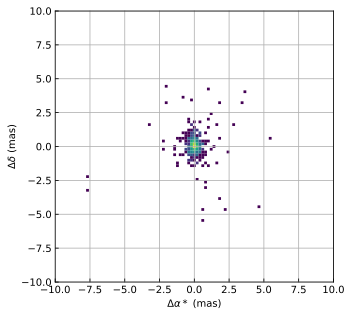

In [15]:
from matplotlib import colors

fig, ax = plt.subplots(figsize=(5, 5))

bins = np.linspace(-10, 10, 100)

# We can increase the number of bins on each axis
ax.hist2d(dRA, dDC, bins, norm=colors.LogNorm())

ax.set_xlabel("$\Delta\\alpha*$ (mas)")
ax.set_ylabel("$\Delta\\delta$ (mas)")

ax.grid(True)

plt.show()

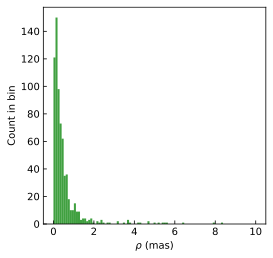

In [16]:
# Distribution of angular separation
bins_array = np.linspace(0, 10, 100)

fig, ax = plt.subplots(figsize=(4, 4))
ax.hist(ang_sep, bins_array, facecolor="g", alpha=0.75)

ax.set_xlabel("$\\rho$ (mas)")
ax.set_ylabel("Count in bin")

plt.show()

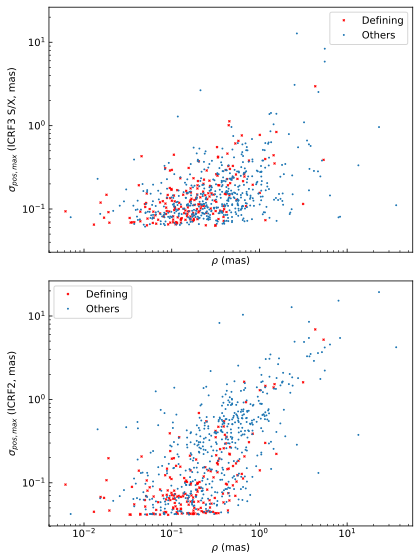

In [17]:
# Angular position difference vs. positional uncertainty
fig, (ax0, ax1) = plt.subplots(figsize=(6, 8), nrows=2, sharex=True, sharey=True)

ax0.plot(com_def["ang_sep"],
         com_def["pos_err_icrf3k"], "rx", ms=2, label="Defining")
ax1.plot(com_def["ang_sep"],
         com_def["pos_err_icrf2"], "rx", ms=2, label="Defining")

ax0.plot(com_oth["ang_sep"],
         com_oth["pos_err_icrf3k"], ".", ms=2, label="Others")
ax1.plot(com_oth["ang_sep"], com_oth["pos_err_icrf2"],
         ".", ms=2, label="Others")

ax0.set_xscale("log")
ax0.set_yscale("log")
ax1.set_xscale("log")
ax1.set_yscale("log")


ax0.set_xlabel("$\\rho$ (mas)")
ax0.set_ylabel("$\sigma_{pos,max}$ (ICRF3 S/X, mas)")
ax1.set_xlabel("$\\rho$ (mas)")
ax1.set_ylabel("$\sigma_{pos,max}$ (ICRF2, mas)")


ax0.legend()
ax1.legend()

fig.tight_layout()
plt.show()

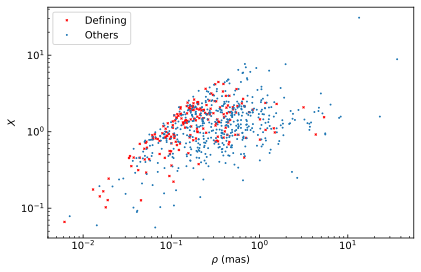

In [18]:
# Angular separation vs. normalized separation
fig, ax = plt.subplots()

ax.plot(com_def["ang_sep"],
         com_def["nor_sep_cov"], "rx", ms=2, label="Defining")
ax.plot(com_oth["ang_sep"],
         com_oth["nor_sep_cov"], ".", ms=2, label="Others")

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel("$\\rho$ (mas)")
ax.set_ylabel("$X$")

ax.legend()

fig.tight_layout()
plt.show()

Then I investigate the systematics through the 16-parameters transformation.

In [19]:
# Try with all the sources
# Transform columns into np.array
dra = np.array(com_sou["dra"])
ddec = np.array(com_sou["ddec"])
dra_err = np.array(com_sou["dra_err"])
ddec_err = np.array(com_sou["ddec_err"])
ra_rad = np.array(com_sou["ra_icrf3k"].to(u.radian))
dec_rad = np.array(com_sou["dec_icrf3k"].to(u.radian))
dra_ddec_cov = np.array(com_sou["dra_ddec_cov"])

# Transformation parameters
# l_max = 1
w1_all, sig1_all, corrcoef1_all, _, _, _ = vsh_deg01_fitting(
    dra, ddec, ra_rad, dec_rad, dra_err, ddec_err,
    cov=dra_ddec_cov, elim_flag="None")

# l_max = 2
w2_all, sig2_all, corrcoef2_all, _, _, _ = vsh_deg02_fitting(
    dra, ddec, ra_rad, dec_rad, dra_err, ddec_err,
    cov=dra_ddec_cov, elim_flag="None")

# mas -> uas
w1 = w1_all * 1.e3
sig1 = sig1_all * 1.e3
w2 = w2_all * 1.e3
sig2 = sig2_all * 1.e3

# Print results
print("Estimates (%6d sources)\n"
      "----------------------------------------------"
      "----------------------------------------------\n"
      "               Rotation [uas]                 "
      "                  Glide [uas]               \n"
      "               x             y             z"
      "               x             y             z\n"
      "----------------------------------------------"
      "----------------------------------------------\n"
      "l_max=1  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  "
      "  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f\n"
      "l_max=2  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  "
      "  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f\n"
      "----------------------------------------------"
      "----------------------------------------------\n" %
      (dra.size, w1[3], sig1[3], w1[4], sig1[4], w1[5], sig1[5],
       w1[0], sig1[0], w1[1], sig1[1], w1[2], sig1[2],
       w2[3], sig2[3], w2[4], sig2[4], w2[5], sig2[5],
       w2[0], sig2[0], w2[1], sig2[1], w2[2], sig2[2]))

quad_names = Column(["ER22", "EI22", "ER21", "EI21", "E20",
                     "MR22", "MI22", "MR21", "MI21", "M20"])
t_quad = Table([quad_names, w2[6:], sig2[6:]], names=["Quadrupolar term", "Estimate", "Error"])
t_quad["Estimate"].format = "%5.0f"
t_quad["Error"].format = "%5.0f"
print(t_quad)

print("Correlation coefficient between parameters in 'l_max=1' fit")
print_vsh1_corr(corrcoef1_all, deci_digit=1, included_one=False)

print("Correlation coefficient between parameters in 'l_max=2' fit")
print_vsh2_corr(corrcoef2_all, deci_digit=1, included_one=False)

# apriori statistics (weighted)
#         mean for RA:     -0.025 mas
#         wrms for RA:      0.952 mas
#          std for RA:      0.951 mas
#        mean for Dec:      0.042 mas
#        wrms for Dec:      1.742 mas
#         std for Dec:      1.740 mas

# apriori reduced Chi-square for:      2.299
# posteriori statistics  of vsh01 fit (weighted)
#         mean for RA:     -0.030 mas
#          rms for RA:      0.952 mas
#          std for RA:      0.951 mas
#        mean for Dec:     -0.012 mas
#         rms for Dec:      1.741 mas
#         std for Dec:      1.739 mas

# posteriori reduced Chi-square for:      2.189
# goodness-of-fit is      0.000
# apriori statistics (weighted)
#         mean for RA:     -0.025 mas
#         wrms for RA:      0.952 mas
#          std for RA:      0.951 mas
#        mean for Dec:      0.042 mas
#        wrms for Dec:      1.742 mas
#         std for Dec:      1.740 mas

# apriori reduced Chi-square for:      2.299
# posteriori statistics of vsh

In [20]:
# Remove the outlier (consider the normalized separation)
N = len(com_sou)
X0 = np.sqrt(np.log(N) * 2)

print("There are %d sources.\n"
      "When X >= %.2f, the number of the outlier is smaller than 1." % (N, X0))

mask = ((com_sou["nor_sep_cov"] <= X0)
        & (com_sou["ang_sep"] < 10)
        & (com_sou["pos_err_icrf3k"] < 10)
        & (com_sou["pos_err_icrf2"] < 10))

# Table of a clean sample
com_clean = com_sou[mask]

print("After elimination, there are %d sources in the clean sample." % len(com_clean))

There are 698 sources.
When X >= 3.62, the number of the outlier is smaller than 1.
After elimination, there are 665 sources in the clean sample.


In [21]:
# Transform columns into np.array
dra = np.array(com_clean["dra"])
ddec = np.array(com_clean["ddec"])
dra_err = np.array(com_clean["dra_err"])
ddec_err = np.array(com_clean["ddec_err"])
ra_rad = np.array(com_clean["ra_icrf3k"].to(u.radian))
dec_rad = np.array(com_clean["dec_icrf3k"].to(u.radian))
dra_ddec_cov = np.array(com_clean["dra_ddec_cov"])

In [22]:
# Transformation parameters
# l_max = 1
w1_cln, sig1_cln, corrcoef1_cln, _, _, _ = vsh_deg01_fitting(
    dra, ddec, ra_rad, dec_rad, dra_err, ddec_err,
    cov=dra_ddec_cov, elim_flag="None")

# l_max = 2
w2_cln, sig2_cln, corrcoef2_cln, _, _, _ = vsh_deg02_fitting(
    dra, ddec, ra_rad, dec_rad, dra_err, ddec_err,
    cov=dra_ddec_cov, elim_flag="None")

# mas -> uas
w1 = w1_cln * 1.e3
sig1 = sig1_cln * 1.e3
w2 = w2_cln * 1.e3
sig2 = sig2_cln * 1.e3

# Print results
print("Estimates (%6d sources)\n"
      "----------------------------------------------"
      "----------------------------------------------\n"
      "               Rotation [uas]                 "
      "                  Glide [uas]               \n"
      "               x             y             z"
      "               x             y             z\n"
      "----------------------------------------------"
      "----------------------------------------------\n"
      "l_max=1  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  "
      "  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f\n"
      "l_max=2  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  "
      "  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f\n"
      "----------------------------------------------"
      "----------------------------------------------\n" %
      (dra.size, w1[3], sig1[3], w1[4], sig1[4], w1[5], sig1[5],
       w1[0], sig1[0], w1[1], sig1[1], w1[2], sig1[2],
       w2[3], sig2[3], w2[4], sig2[4], w2[5], sig2[5],
       w2[0], sig2[0], w2[1], sig2[1], w2[2], sig2[2]))

quad_names = Column(["ER22", "EI22", "ER21", "EI21", "E20",
                     "MR22", "MI22", "MR21", "MI21", "M20"])
t_quad = Table([quad_names, w2[6:], sig2[6:]], names=["Quadrupolar term", "Estimate", "Error"])
t_quad["Estimate"].format = "%5.0f"
t_quad["Error"].format = "%5.0f"
print(t_quad)

print("Correlation coefficient between parameters in 'l_max=1' fit")
print_vsh1_corr(corrcoef1_cln, deci_digit=1, included_one=False)

print("Correlation coefficient between parameters in 'l_max=2' fit")
print_vsh2_corr(corrcoef2_cln, deci_digit=1, included_one=False)

# apriori statistics (weighted)
#         mean for RA:      0.015 mas
#         wrms for RA:      0.605 mas
#          std for RA:      0.604 mas
#        mean for Dec:      0.080 mas
#        wrms for Dec:      0.761 mas
#         std for Dec:      0.756 mas

# apriori reduced Chi-square for:      1.092
# posteriori statistics  of vsh01 fit (weighted)
#         mean for RA:      0.015 mas
#          rms for RA:      0.605 mas
#          std for RA:      0.605 mas
#        mean for Dec:      0.031 mas
#         rms for Dec:      0.756 mas
#         std for Dec:      0.755 mas

# posteriori reduced Chi-square for:      0.999
# goodness-of-fit is      0.000
# apriori statistics (weighted)
#         mean for RA:      0.015 mas
#         wrms for RA:      0.605 mas
#          std for RA:      0.604 mas
#        mean for Dec:      0.080 mas
#        wrms for Dec:      0.761 mas
#         std for Dec:      0.756 mas

# apriori reduced Chi-square for:      1.092
# posteriori statistics of vsh

Then I check the residuals of positional offsets.

In [23]:
# Remove the systematics
RA = np.array(com_sou["ra_icrf3k"].to(u.radian))
DE = np.array(com_sou["dec_icrf3k"].to(u.radian))

# dra_ns, ddec_ns = residual_calc02(dRA, dDC, RA, DE, w2_cln)
dra_ns, ddec_ns = residual_calc02(dRA, dDC, RA, DE, w2_all)

# Now re-calculate the normalized difference
ang_sep_ns, Xa_ns, Xd_ns, X_ns, _ = nor_sep(
    dra_ns, dRA_err, ddec_ns, dDC_err, dRA_dDC_cov/dRA_err/dDC_err)

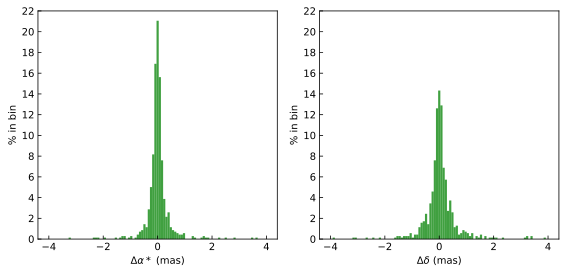

In [24]:
# Difference in RA and decl.
bins_array = np.linspace(-4, 4, 100)
weights = np.ones_like(dra_ns) * 100. / dra_ns.size

fig, (ax0, ax1) = plt.subplots(figsize=(8, 4), ncols=2)
ax0.hist(dra_ns, bins_array, weights=weights, facecolor="g", alpha=0.75)
ax1.hist(ddec_ns, bins_array, weights=weights, facecolor="g", alpha=0.75)

ax0.set_yticks(np.arange(0, 23, 2))
ax1.set_yticks(np.arange(0, 23, 2))

ax0.set_ylim([0, 22])
ax1.set_ylim([0, 22])

ax0.set_xlabel("$\Delta\\alpha*$ (mas)")
ax1.set_xlabel("$\Delta\\delta$ (mas)")

ax0.set_ylabel("% in bin")
ax1.set_ylabel("% in bin")

fig.tight_layout()
plt.show()

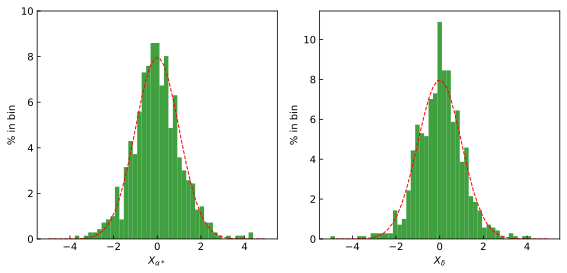

In [25]:
# Normalized difference in RA and decl.
from scipy import stats
bins_array = np.linspace(-5, 5, 50)
weights = np.ones_like(Xa_ns) * 100. / Xa_ns.size

# Plot the 
fig, (ax0, ax1) = plt.subplots(figsize=(8, 4), ncols=2)
ax0.hist(Xa_ns, bins_array, weights=weights, facecolor="g", alpha=0.75)
ax1.hist(Xd_ns, bins_array, weights=weights, facecolor="g", alpha=0.75)

ax0.set_xlabel("$X_{\\alpha*}$")
ax1.set_xlabel("$X_{\\delta}$")

ax0.set_ylabel("% in bin")
ax1.set_ylabel("% in bin")

# add a '(standard) Gaussian distribution' line
Gaussian_dist = stats.norm.pdf(bins_array, 0, 1) * 10. / 50
ax0.plot(bins_array, Gaussian_dist * 100, "r--", linewidth=1)
ax1.plot(bins_array, Gaussian_dist * 100, "r--", linewidth=1)

ax0.set_yticks(np.arange(0, 11, 2))
ax1.set_yticks(np.arange(0, 11, 2))

fig.tight_layout()
plt.show()

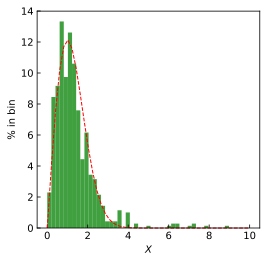

In [26]:
# Distribution of normalized separation
from scipy import stats

bins_array = np.linspace(0, 10, 50)
weights = np.ones_like(X_ns) * 100. / X_ns.size

fig, ax = plt.subplots(figsize=(4, 4))
ax.hist(X_ns, bins_array, weights=weights, facecolor="g", alpha=0.75)

# add a '(standard) Rayleigh distribution' line
rayleigh_dist = stats.rayleigh.pdf(bins_array) * 10. / 50  * 100
ax.plot(bins_array, rayleigh_dist, "r--", linewidth=1)

ax.set_xlabel("$X$")
ax.set_ylabel("% in bin")

plt.show()

The last step is to save the 16 transformation parameters for further use.

In [27]:
vsh2_names = Column(["D1", "D2", "D3",
                     "R1", "R2", "R3",
                     "ER22", "EI22", "ER21", "EI21", "E20",
                     "MR22", "MI22", "MR21", "MI21", "M20"])
t_vsh2 = Table([vsh2_names, w2, sig2], names=[
               "Names", "Estimate", "Error"])
t_vsh2["Estimate"].format = "%5.0f"
t_vsh2["Error"].format = "%5.0f"
t_vsh2["Estimate"].unit = u.uas
t_vsh2["Error"].unit = u.uas
t_vsh2.write("../logs/icrf3k_icrf2_vsh02.log", format="ascii")